In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12,7)

In [2]:
senti = pd.read_csv('C:\\Users\\MASHKOOR KHADER\\Desktop\\imarticus\\DEEP LEARNING\\Sentiment.csv')
senti.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,07-08-15 9:54,6.296970e+17,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,07-08-15 9:54,6.296970e+17,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,07-08-15 9:54,6.296970e+17,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,07-08-15 9:54,6.296970e+17,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,07-08-15 9:54,6.296970e+17,NaN,Arizona


# Q1. Print the total number of positive and negative sentiments

In [3]:
# Now We take only two columns for DL

senti = senti[['sentiment','text']]

In [4]:
senti

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
...,...,...
13866,Negative,RT @cappy_yarbrough: Love to see men who will ...
13867,Positive,RT @georgehenryw: Who thought Huckabee exceede...
13868,Positive,"RT @Lrihendry: #TedCruz As President, I will a..."
13869,Negative,RT @JRehling: #GOPDebate Donald Trump says tha...


Text(0.5, 1.0, 'Count Plot of sentiment')

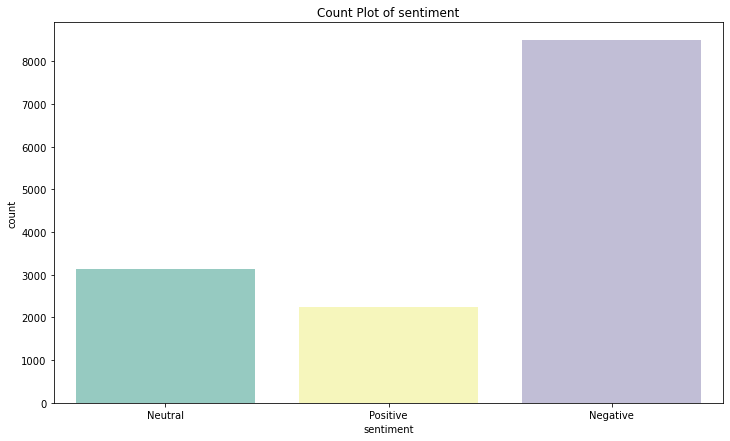

In [5]:
sns.countplot(senti['sentiment'], palette="Set3")
plt.title('Count Plot of sentiment')

# 

In [6]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\MASHKOOR
[nltk_data]     KHADER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
StopWords = set(stopwords.words('english'))

In [9]:
def clean(text):
    text = ' '.join([word.lower() for word in text.split() if word.lower() not in StopWords and 'https' not in word and 'http' not in word and '@' not in word])
    text = text.replace('#','')
    trans = str.maketrans('','',string.punctuation)
    text.translate(trans)
    text = re.sub('[^A-Za-z ]+', '', text)
    return text

In [10]:
clean_text = []

for text in senti['text']:
    clean_text.append(clean(text))

In [11]:
clean_text1 = [line.strip() for line in clean_text]
clean_text1

['rt everyone feel climate change question last night exactly gopdebate',
 'rt catch full gopdebate last night scotts best lines  seconds walker',
 'rt mention tamir rice gopdebate held cleveland wow',
 'rt carly fiorina trending  hours debate  men justcompleted gopdebate says',
 'rt gopdebate w delivered highest ratings history presidential debates trump',
 'rt on first day rescind every illegal executive action taken barack obama gopdebate',
 'rt liked happy heard going moderator anymore gopdebate',
 'going msnbc live around  pm et gopdebate',
 'deer headlights rt ben carson may brain surgeon performed lobotomy himself gopdebate',
 'rt last nights debate proved it gopdebate batsask tbats',
 'fairness billclinton owns phrasegopdebate',
 'rt woke tweet gopdebate best line night via',
 'reading familys comments great gopdebate',
 'rt rt dear gopdebate notamistake',
 'rt loved scott walker mark harmons romantic rival summer school look up gopdebate',
 'hey exploiting tragedy  political g

In [12]:
clean_text2 = " ".join(clean_text1)
clean_text2

'rt everyone feel climate change question last night exactly gopdebate rt catch full gopdebate last night scotts best lines  seconds walker rt mention tamir rice gopdebate held cleveland wow rt carly fiorina trending  hours debate  men justcompleted gopdebate says rt gopdebate w delivered highest ratings history presidential debates trump rt on first day rescind every illegal executive action taken barack obama gopdebate rt liked happy heard going moderator anymore gopdebate going msnbc live around  pm et gopdebate deer headlights rt ben carson may brain surgeon performed lobotomy himself gopdebate rt last nights debate proved it gopdebate batsask tbats fairness billclinton owns phrasegopdebate rt woke tweet gopdebate best line night via reading familys comments great gopdebate rt rt dear gopdebate notamistake rt loved scott walker mark harmons romantic rival summer school look up gopdebate hey exploiting tragedy  political gain thing gopdebate rt donaldtrump fire comments women weigh 

In [13]:
words_dict = {}

for word in clean_text2.split():
    words_dict[word] = words_dict.get(word, 0) + 1
for key in sorted(words_dict):
    print("{}:{}".format(key, words_dict[key]))

a:38
aa:2
aaaaaaaaaaaaaaand:1
aaaaand:1
aaaand:5
aaand:3
aaron:1
ab:1
abandon:7
abandoned:2
abandoning:2
abbott:2
abc:11
abcs:2
abe:2
abhorrent:1
ability:6
able:15
ableg:1
abo:4
abolish:1
abolished:1
abort:2
aborted:1
aborting:3
abortion:100
abortioni:1
abortioninducing:1
abortionismurder:1
abortions:22
abortus:1
abou:1
abound:1
about:38
aboutlastnight:1
abraham:5
abroad:1
absence:1
absofuckinglutely:1
absolute:4
absolutely:33
absolutes:1
absurd:4
absurdwith:1
abt:19
abusers:1
abuses:1
abusing:1
abusive:3
abysmal:1
ac:2
aca:1
accent:1
accept:5
acceptable:8
acceptance:2
accepted:2
accepting:1
accepts:1
access:6
accessible:1
accessory:1
accident:1
accidentally:11
accomplished:1
accomplishment:1
accomplishments:7
accomplishmentsare:1
according:24
accordingly:1
accordingmy:1
account:7
accountability:1
accountable:2
accounts:1
acct:3
accu:1
accuracy:1
accurate:5
accurately:1
accusation:3
accusations:3
accuse:1
ace:1
achievement:1
achieving:1
aching:1
ack:1
ackit:1
acres:2
across:18
act:59
a

crawford:1
crawl:1
crawls:1
crazier:4
crazies:1
craziness:1
crazy:33
crazygt:2
cream:6
create:11
created:17
creates:4
creating:4
cred:2
credibility:4
credible:3
credit:16
creditors:4
credits:1
creepy:9
cresenergy:1
crew:4
crickets:4
cried:1
cries:3
crime:3
crimes:1
criminal:4
criminalabusesnowpoisedpoliceourhealthcare:1
criminality:1
criminals:4
cringe:1
cringeworthy:1
crippling:1
crisis:5
crispie:7
crispin:1
cristie:1
criterion:1
critic:1
critical:4
criticalrole:1
criticism:2
criticized:1
criticizing:2
critics:2
critique:1
critiques:1
critters:1
crocs:1
cronkite:1
crony:2
crooked:8
crop:1
cross:4
crossin:1
crossing:1
crossover:2
crow:1
crowd:19
crowded:3
crowley:8
crowleys:2
crowning:1
crowns:1
crucified:1
crucify:1
crude:1
cruel:2
cruelly:1
cruising:1
crumbling:1
crush:4
crushed:1
crushes:2
crushing:2
cruz:419
cruzand:1
cruzc:1
cruzcontrol:1
cruzcr:1
cruzcrew:38
cruzhatesgaypeople:1
cruzimabigboy:1
cruzl:1
cruzrubio:1
cruzs:28
cruztovi:1
cruztovictory:4
cry:6
crybaby:1
crying:10
csi:

halfcatching:1
halffullhalfmt:1
halfway:1
hall:1
halleloo:1
hamilton:2
hammered:1
hammering:2
hammers:2
hamms:1
hampshire:5
hand:28
handcuffs:10
handed:20
handedly:1
handful:2
handing:3
handle:19
handled:9
handling:2
hands:108
handy:1
haney:1
hang:5
hangembytheneck:1
hangin:1
hanging:3
hangover:37
hanks:2
hannibal:2
hannity:18
hapless:2
happen:16
happended:1
happened:74
happenedgop:1
happening:5
happenings:1
happeningtrump:1
happens:8
happier:1
happiest:12
happy:14
happyfriday:1
happyhour:3
happywealthy:1
harbor:2
harboring:1
hard:76
hardball:7
harddrawing:1
harder:2
hardest:1
hardesthitting:5
hardhearted:1
hardhitting:2
hardly:3
hardships:1
hardswoon:1
hardworking:1
harley:1
harleys:1
harlot:2
harm:5
harmed:1
harmons:1
harms:1
harpoon:1
harry:2
has:3
hashed:1
hashtag:12
hashtags:1
hasnt:2
hasten:1
hat:5
hatchet:3
hate:67
hated:3
hateful:4
hatemail:4
hater:1
haters:4
hates:25
hating:2
hatingliberino:1
hatred:4
hats:2
hav:1
have:10
havent:3
havoc:1
hawing:1
hawking:1
hayes:1
haymaker:1


murdered:4
murdering:3
murders:1
murdoch:3
murdock:1
murica:3
murray:1
mush:3
mushin:1
music:167
musician:1
muslims:2
must:55
mustread:1
mutant:21
mutants:1
mute:4
muted:1
muther:1
muting:1
mvmntno:1
mvp:1
mw:1
my:21
myacash:1
myeyesjustrolledouttamyhead:1
mymotheralwaystoldme:1
mysa:1
myself:7
mysoginistic:1
mystified:1
n:15
na:2
nae:1
naes:1
nah:3
nailed:10
nailing:2
nails:80
naivete:1
naked:1
nalin:1
name:46
named:8
namekasich:1
names:13
nana:1
nanosecond:1
napalm:1
napoleon:1
naral:1
narcissism:1
narcissist:2
narcissistic:2
narcissists:2
narrative:4
narrow:3
narrowed:1
narrower:2
nashnext:1
nashville:3
nass:1
nasty:11
nat:2
nati:1
nation:27
national:28
nationality:1
nationalsecurity:1
nationalunderwearday:1
nations:10
nationwide:4
native:3
natives:1
nativist:1
nativists:1
natl:2
natural:4
naturally:2
nature:1
nauseous:1
naval:1
navyseal:1
nawl:1
nazi:1
nazis:2
nba:2
nbc:1
nc:1
ncaa:2
nd:33
ndlook:2
nea:2
neanderthal:1
near:3
nearly:6
neat:4
neatruthsquad:1
nebula:1
necessarily:1
ne

sciencenotsex:1
scientific:3
scientologists:1
scofflaw:2
scoffs:1
scold:1
scolded:1
score:6
scorecard:1
scored:2
scores:1
scoring:1
scorpion:2
scotch:1
scott:99
scotts:2
scottwalker:23
scottwalkers:1
scotty:1
scotus:3
scotuss:1
scoundrel:1
scrambled:1
scrap:1
scraps:1
scratch:1
scream:3
screaming:5
screams:2
screechy:2
screen:6
screenings:4
screenshot:1
screenshots:1
screw:6
screwed:10
screwing:1
screws:1
screwy:1
script:1
scriptgopdebates:1
scriptures:6
scrolled:1
scrub:3
scrum:1
sctwe:1
scumbag:2
scut:1
se:1
sea:1
sealed:3
sealevelrise:1
sean:4
search:6
searched:1
searches:2
searching:3
season:12
seasons:2
seat:4
seats:1
sec:6
second:32
secondhand:1
seconds:15
secondstage:1
secondswatch:1
secondtier:2
secprimary:1
secret:9
secretary:3
secretly:2
secretlylovepolitics:1
secs:2
section:1
sectiongopdebate:1
sector:1
secular:4
secularism:1
secure:11
secured:1
securetheborder:1
securing:1
security:46
securityillegal:1
securitynational:1
see:264
seehear:1
seeing:20
seek:2
seeking:1
seeknow:

violated:3
violates:2
violating:2
violen:1
violence:22
violent:4
violently:2
violin:1
viral:1
virg:1
virtually:1
visa:1
visas:1
visible:1
vision:7
visionary:1
visit:1
visited:2
visiting:1
visits:2
visual:3
visually:1
vital:2
vito:3
vive:1
vivisectors:1
vladmir:1
vnewscd:1
voa:1
vodka:2
vogons:1
voice:13
voicemail:1
voiceovers:1
voices:13
voicesher:1
void:1
voldemort:1
volume:2
volumes:5
volunteers:1
vomit:2
vomiting:1
vote:157
voteblue:5
voted:10
votegopdebate:1
voter:29
voters:60
voterscandidates:1
votersfirst:1
votes:7
votetrueblue:1
votetrump:1
voteyall:2
voting:66
votingcivil:1
votingrights:8
votingrightsact:1
voucher:1
vouchers:2
vowed:1
vowing:1
vows:3
vp:9
vr:1
vra:11
vs:47
vu:1
w:111
wa:1
wackos:1
wacky:6
wade:1
waders:1
waffled:1
wage:6
wages:10
wagons:1
wahlberg:1
wairtime:1
wait:68
waited:1
waiters:1
waiting:29
waitingpalin:1
waitits:1
wake:5
waker:1
wakes:2
wakeupamer:1
wakeupamerica:30
wakeupeveryone:1
waking:1
walace:1
walk:9
walked:4
walker:215
walkerb:1
walkergranny:1
w

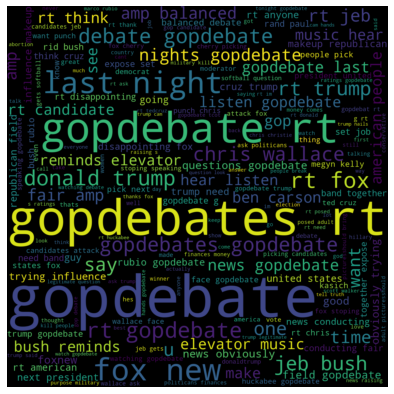

In [14]:
Word_Cloud = WordCloud(width = 1500, height = 1500, margin = 0).generate(clean_text2)
plt.imshow(Word_Cloud, interpolation = 'bilinear')
plt.axis('off')
plt.margins(x = 0, y = 0)
plt.show()

In [15]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\MASHKOOR
[nltk_data]     KHADER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [17]:
analyzer = SentimentIntensityAnalyzer()

In [18]:
scores = analyzer.polarity_scores(clean_text2)

In [19]:
for k in sorted(scores):
    print('{0}:{1},'.format(k, scores[k]), end = ' ')

compound:1.0, neg:0.137, neu:0.672, pos:0.191, 

In [20]:
senti = pd.read_csv('C:\\Users\\MASHKOOR KHADER\\Desktop\\imarticus\\DEEP LEARNING\\Sentiment.csv')

In [21]:
senti = senti[['sentiment','text']]

In [22]:
senti = senti[senti.sentiment != "Neutral"]
senti['text'] = senti['text'].apply(lambda x: x.lower())
senti['text'] = senti['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(senti[ senti['sentiment'] == 'Positive'].size)
print(senti[ senti['sentiment'] == 'Negative'].size)

4472
16986


In [23]:
for idx,row in senti.iterrows():
    row[0] = row[0].replace('rt',' ')

In [24]:
from keras.preprocessing.text import Tokenizer

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [26]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(senti['text'].values)
X = tokenizer.texts_to_sequences(senti['text'].values)
X = pad_sequences(X)

# Q2. Build a sequential LSTM model to predict positive and negative sentiments.

In [27]:
import numpy as np 
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [28]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 128)           256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 28, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 2)                 394       
                                                                 
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
Y = pd.get_dummies(senti['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 6)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7188, 28) (7188, 2)
(3541, 28) (3541, 2)


In [30]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2)

Epoch 1/10
225/225 - 21s - loss: 0.4286 - accuracy: 0.8233 - 21s/epoch - 92ms/step
Epoch 2/10
225/225 - 17s - loss: 0.3176 - accuracy: 0.8637 - 17s/epoch - 74ms/step
Epoch 3/10
225/225 - 21s - loss: 0.2732 - accuracy: 0.8836 - 21s/epoch - 91ms/step
Epoch 4/10
225/225 - 22s - loss: 0.2374 - accuracy: 0.9033 - 22s/epoch - 97ms/step
Epoch 5/10
225/225 - 20s - loss: 0.2121 - accuracy: 0.9153 - 20s/epoch - 90ms/step
Epoch 6/10
225/225 - 21s - loss: 0.1894 - accuracy: 0.9214 - 21s/epoch - 91ms/step
Epoch 7/10
225/225 - 20s - loss: 0.1700 - accuracy: 0.9311 - 20s/epoch - 89ms/step
Epoch 8/10
225/225 - 20s - loss: 0.1556 - accuracy: 0.9377 - 20s/epoch - 91ms/step
Epoch 9/10
225/225 - 21s - loss: 0.1434 - accuracy: 0.9410 - 21s/epoch - 93ms/step
Epoch 10/10
225/225 - 21s - loss: 0.1320 - accuracy: 0.9448 - 21s/epoch - 93ms/step


In [31]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

64/64 - 2s - loss: 0.5594 - accuracy: 0.8295 - 2s/epoch - 36ms/step
score: 0.56
acc: 0.83


In [32]:
text = ['He is a great leader.']

text = tokenizer.texts_to_sequences(text)

text = pad_sequences(text, maxlen=28, dtype='int32', value=0)
print(text)
sentiment = model.predict(text,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")



[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  34   6   8 144 337]]
1/1 - 1s - 617ms/epoch - 617ms/step
positive


## Q3. Based on the model, check the sentiment for the following
## two sentences


In [33]:
#Model Prediction
text = ['He is a great leader.']
#vectorizing the tweet by the pre-fitted tokenizer instance
text = tokenizer.texts_to_sequences(text)
#padding the tweet to have exactly the same shape as `embedding_2` input
text = pad_sequences(text, maxlen=28, dtype='int32', value=0)

sentiment = model.predict(text,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")


1/1 - 0s - 32ms/epoch - 32ms/step
positive


In [34]:
text = ['He is a terrible leader.']
#vectorizing the tweet by the pre-fitted tokenizer instance
text = tokenizer.texts_to_sequences(text)
#padding the tweet to have exactly the same shape as `embedding_2` input
text = pad_sequences(text, maxlen=28, dtype='int32', value=0)

sentiment = model.predict(text,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

1/1 - 0s - 32ms/epoch - 32ms/step
negative


In [35]:
#With User define function
def model_inference(text):
    text_t = [text]
    text_t = tokenizer.texts_to_sequences(text_t)
    text_t = pad_sequences(text_t, maxlen=28, dtype='int32', value=0)
    sentiment = model.predict(text_t,batch_size=1,verbose = 2)[0]
    if(np.argmax(sentiment) == 0):
        print("negative")
    elif (np.argmax(sentiment) == 1):
        print("positive")
  

## a. 'He is a great leader.'

In [36]:
text = 'He is a great leader.'
model_inference(text) 

1/1 - 0s - 32ms/epoch - 32ms/step
positive


## b. 'He is a terrible leader.'

In [37]:
text1 = 'He is a terrible leader.'
model_inference(text1)  

1/1 - 0s - 32ms/epoch - 32ms/step
negative
